# Desafío - Dimensionalidad y Agrupación (I)

## Desafío 1: Lectura de archivos
- Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
- Importe la base de datos bfi.csv y asígnela a un objeto df .
- Solicite las primeras 5 observaciones con head .


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')


plt.rcParams['figure.figsize']=(10,10)


In [2]:
import factor_analyzer as fact
import missingno as msngo

In [3]:
df = pd.read_csv('bfi.csv').drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Desafío 2: Preprocesamiento
- Elimine las columnas redundantes de la base, tal como 'Unnamed: 0' .
- Analice el patrón de datos perdidos con missingno . Comente cuáles son las principales variables con mayores tasas de valores perdidos.
- Genere un nuevo objeto donde almacenará la base sin valores perdidos.

<Figure size 288x288 with 0 Axes>

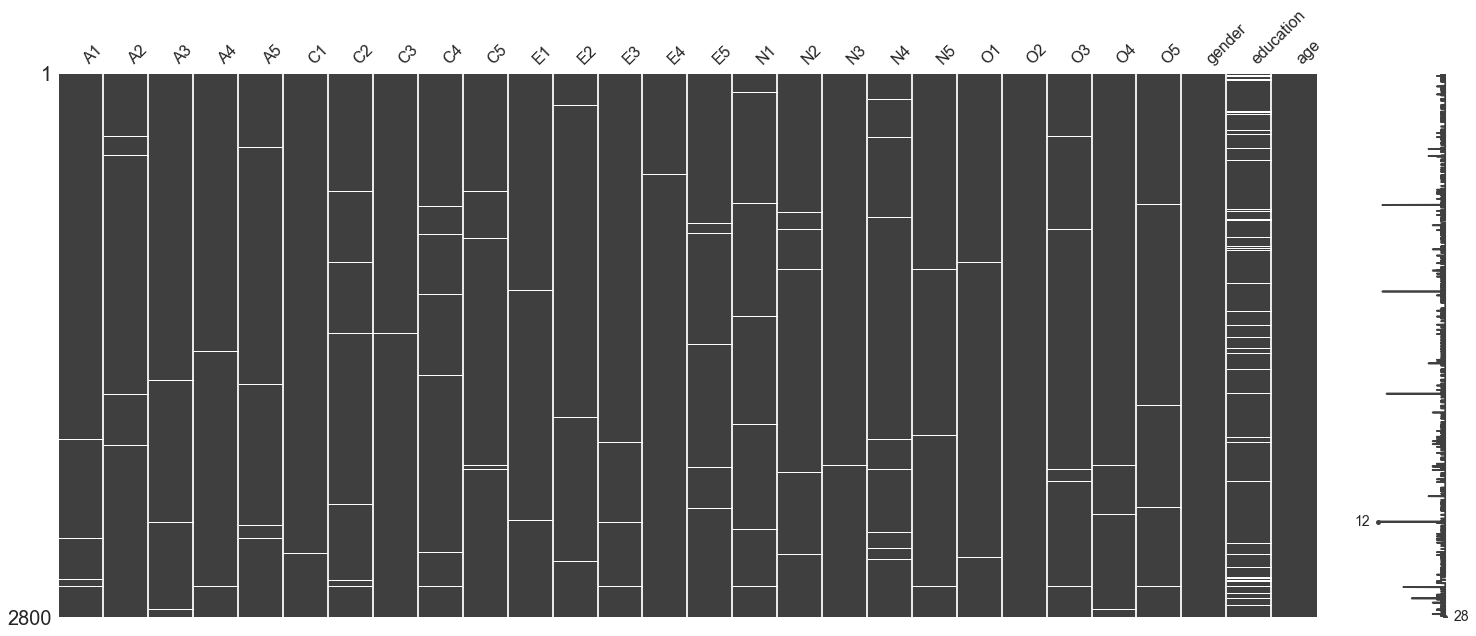

In [5]:
plt.figure(figsize=(4,4))
msngo.matrix(df);

In [6]:
# falta comentar

In [7]:
df_drop = df.dropna()
df_drop.shape

(2236, 28)

# Desafío 3: Descripción
- Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
- Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
- Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [8]:
df_drop_trust = df_drop.loc[:,'A1':'O5']

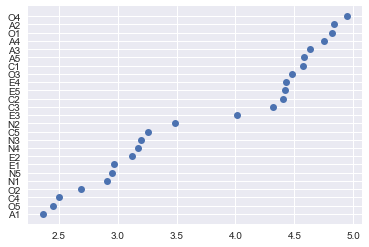

In [9]:
variable=[]
mean=[]
for colname, serie in df_drop_trust.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
df_temporal= pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
plt.plot(df_temporal['mean'], df_temporal['var'],'o')
    

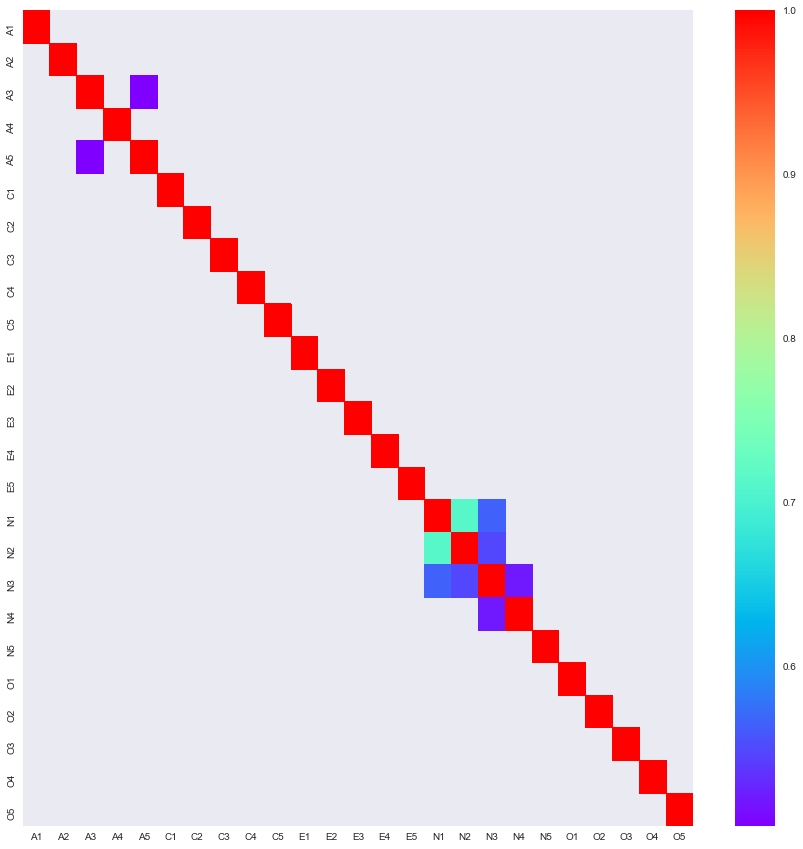

In [10]:
correlacion= df_drop_trust.corr()

correlacion = correlacion[correlacion >0.5]

plt.figure(figsize=(15,15))
sns.heatmap(correlacion, cmap='rainbow')


## Desafío 4: Extracción de factores
- Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-MeyerOlkin. Comente los resultados.
- Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
- Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
- Extraiga las cargas del modelo e identifique qué items están asociados a cada factor. Comente sobre qué significa cada factor construído.


In [11]:
fact.calculate_bartlett_sphericity(df_drop_trust)

(16509.6735504972, 0.0)

In [12]:
fact.calculate_kmo(df_drop_trust)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

In [13]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer (n_factors=10, rotation= None)
fa.fit(df_drop_trust)

pd.DataFrame(fa.loadings_.round(2), index =df_drop_trust.columns)



,0,1,2,3,4,5,6,7,8,9
A1,-0.21,-0.03,0.15,0.02,-0.39,0.28,0.07,-0.03,0.00,-0.01
A2,0.46,0.31,-0.21,0.14,0.37,-0.24,0.12,0.16,-0.10,-0.06
A3,0.52,0.31,-0.26,0.10,0.28,0.01,0.14,-0.14,0.09,0.01
A4,0.40,0.12,-0.15,0.27,0.15,0.02,0.01,-0.14,-0.03,0.02
A5,0.57,0.19,-0.26,0.03,0.17,0.14,0.02,-0.06,0.12,0.06
C1,0.33,0.13,0.47,0.15,0.01,0.13,-0.07,0.19,0.18,0.01
C2,0.32,0.18,0.45,0.31,0.05,0.16,-0.06,0.04,-0.01,0.02
C3,0.32,0.05,0.32,0.33,0.03,0.03,0.04,0.08,-0.07,-0.02
C4,-0.47,0.12,-0.45,-0.26,0.02,0.26,0.08,0.08,-0.08,0.03
C5,-0.49,0.15,-0.28,-0.31,0.11,0.05,0.01,0.23,0.13,-0.01


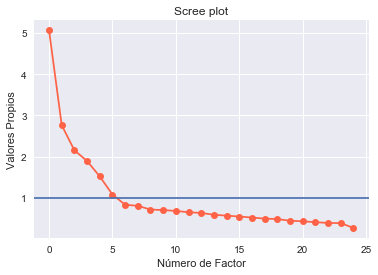

In [14]:
#Grafico para seleccionar número de factores

factor_screeplot =  fa.get_eigenvalues()[0]
plt.plot(factor_screeplot, 'o-', color='tomato')# no esta igual que en el documento, porque este es un array no un DF
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title("Scree plot");

In [15]:
# refactorizamos y cambiamos 

fa_refac = FactorAnalyzer (n_factors=6, rotation= None)# son 6 variables significativas
fa_refac.fit(df_drop_trust)

factor_loadings= pd.DataFrame(fa_refac.loadings_.round(2), index =df_drop_trust.columns)

factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

,0,1,2,3,4,5
A1,,,,,,
A2,0.46,,,,,
A3,0.52,,,,,
A4,0.4,,,,,
A5,0.57,,,,,
C1,,,0.44,,,
C2,,,0.45,,,
C3,,,,,,
C4,,,,,,
C5,,,,,,


In [16]:
# describir los factores segun las preguntas con las que se relacionan

## Desafío 5: Modelación de factores
- Extraiga los puntajes del modelo factorial a su base de datos.
- Grafique la densidad de cada uno con kdplot .
- Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

In [17]:
extract_factor_scores=fa_refac.transform(df_drop_trust)
scores=pd.DataFrame(extract_factor_scores)

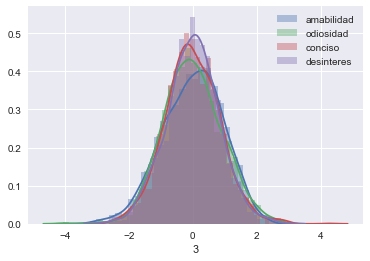

In [18]:

sns.distplot(scores.loc[:,0], label ='amabilidad')
sns.distplot(scores.loc[:,1], label ='odiosidad')
sns.distplot(scores.loc[:,2], label ='conciso')
sns.distplot(scores.loc[:,3], label ='desinteres')

plt.legend()


In [19]:
df_drop_trust.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


In [20]:
data_dem = df.loc[:,'gender':'age']

data_dem.index = extract_factor_scores.index

data_reg = pd.concat([extract_factor_scores, data_dem], axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'index'